## Erschließungsstrategien für unbekannten Wortschatz von DaF-Lernenden an spanischen Universitäten (2017-19)
# Datenanalyse der begleitenden Lehrendenbefragung

#### Werkzeuge und Daten importieren

In [1]:
from funktionen import *
import pandas as pd
import matplotlib
import numpy as np
import scipy as sp
import math
from scipy import stats
from biofes import biplot
from sklearn.utils.extmath import randomized_svd
from sklearn.cluster import KMeans, AgglomerativeClustering
import seaborn as sns
sns.set(style="white") #"white", "darkgrid"...
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
Daten1 = pd.read_excel('D:\Daten\DISS\Daten\Estrategias_Profesores_Kienberger_P2017_int.xlsx', encoding='utf-16')

In [3]:
Daten2 = pd.read_excel('D:\Daten\DISS\Daten\Estrategias_Profesores_Kienberger_2018_ber.xlsx',encoding='utf-16')

In [4]:
Daten2.index = [10 + i for i in Daten2.index]

In [5]:
Daten = pd.concat([Daten1, Daten2], axis=0, join='outer', sort=True)

In [6]:
Daten1.shape

(10, 130)

In [7]:
Daten2.shape

(43, 128)

In [8]:
Daten.shape

(53, 131)

In [9]:
Daten = Daten.fillna(0)

In [10]:
Daten.to_excel('D:\Daten\DISS\Daten\Estrategias_Profesores_Kienberger_2017-18.xlsx',encoding='utf-16')

#### Glossar erstellen

Datei aufrufen, die in einem anderem Notebook erstellt und gespeichert wurde

In [11]:
gloss = pd.read_pickle('D:\Daten\DISS\Daten\GlossProf2018')

#### Untergruppen und Listen für die Analyse

In [12]:
Liste_A_Q1 = [col for col in Daten.columns if 'A-Q1' in col]
Liste_A_Q1.pop(9)

'A-Q1a'

In [13]:
Liste_B_Q1 = [col for col in Daten.columns if 'B-Q1' in col]
Liste_B_Q1.pop(len(Liste_B_Q1)-1)
Liste_B_Q1 = [el for el in Liste_B_Q1 if 'TEXT' not in el]

In [14]:
Liste_B_Q2 = [col for col in Daten.columns if 'B-Q2' in col]
Liste_B_Q2.pop(7)

'B-Q2a'

In [15]:
Liste_B_Q3 = [col for col in Daten.columns if 'B-Q3' in col]
Liste_B_Q3.pop(8)

'B-Q3a'

In [16]:
#Liste_C_Q1 = [col for col in Daten.columns if 'C-Q1' in col]
#Liste_C_Q1.pop(10)

In [17]:
Liste_C_Q1 = ['C-Q1_1','C-Q1_2','C-Q1_3','C-Q1_4','C-Q1_5','C-Q1_6','C-Q1_7','C-Q1_8','C-Q1_9','C-Q1_10']

### Cronbach's Alpha berechnen

In [18]:
CronbachAlpha(Daten[Liste_A_Q1])

0.568059342251001

In [19]:
CronbachAlpha(Daten[Liste_B_Q2])

0.753814906537855

In [20]:
CronbachAlpha(Daten[Liste_B_Q3])

0.7597284181162175

In [21]:
CronbachAlpha(Daten[Liste_C_Q1])

0.5694013756492222

In [22]:
Liste_AB = Liste_A_Q1 + Liste_B_Q2 + Liste_B_Q3

In [23]:
Liste_ABC = Liste_AB + Liste_C_Q1

In [24]:
CronbachAlpha(Daten[Liste_ABC])

0.8608776333182738

### Zeitanalyse

In [25]:
Dur = Daten['Duration (in seconds)']

In [26]:
Dur = pd.to_numeric(Daten['Duration (in seconds)'])

In [27]:
Dur.describe()

count        53.000000
mean       7613.603774
std       47344.626277
min         377.000000
25%         597.000000
50%         866.000000
75%        1053.000000
max      345611.000000
Name: Duration (in seconds), dtype: float64

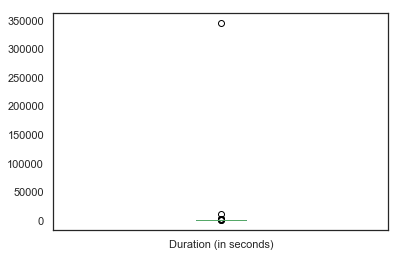

In [28]:
Dur.plot.box();

Überblick über die Beantwortungszeit und Darstellung in einem Boxplot, um Outlyers zu erkennen (z.B. TN, die an einem Tag begonnen und später beendet haben...), diese sollen nicht mit berücksichtigt werden. 

Sinnvoll ist, eine Grenze bei ca. einer Stunde Beantwortungszeit (3600 sek) festzulegen.

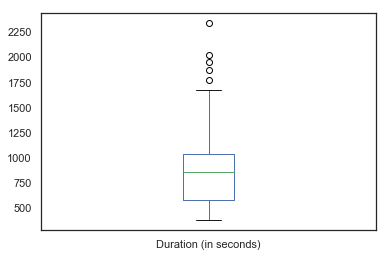

In [29]:
Dur[Dur < 4000].plot.box();

In [30]:
Dur[Dur < 4000].describe()

count      51.000000
mean      911.117647
std       462.940024
min       377.000000
25%       574.500000
50%       854.000000
75%      1034.000000
max      2341.000000
Name: Duration (in seconds), dtype: float64

In [31]:
(Dur[Dur < 4000].mean())/60

15.185294117647059

In [32]:
(Dur[Dur < 4000].std())/60

7.715667067768904

Schlussfolgerung:

Die durchschnittliche Beantwortungszeit liegt bei ca. 15min, wobei große Unterschiede zwischen den TN beobachtet werden können.

### Analyse der Angaben zur Strategiennutzung der Lernenden

Items:
1. Die Lernenden erschließen unbekannte Wörter mit Hilfe ihrer Muttersprache.
2. Die Lernenden erschließen unbekannte Wörter mit Hilfe anderer Sprachen.
3. Die Lernenden nutzen ihr Wissen über das Deutsche, z.B. bekannte Wörter, Wortarten oder Kompositabildung.
4. Die Lernenden nutzen Informationen aus dem Kontext, z.B. die Position des Wortes im Satz oder die Gestaltung des Textes.
5. Die Lernenden bitten Sie oder andere Lehrpersonen um Hilfe.
6. Die Lernenden bitten andere Kursteilnehmer/innen um Hilfe.
7. Die Lernenden konsultieren ein Wörterbuch oder eine andere Quelle (Printversion oder digital).
8. Ich beobachte deutliche individuelle Unterschiede im Strategiengebrauch der Lernenden.
9. Ich beobachte deutliche Unterschiede im Strategiengebrauch unterschiedlicher Lernergruppen, z.B. Anfänger - Fortgeschrittene.

In [33]:
df_describe(Daten[Daten[Liste_A_Q1] != 0], Liste_A_Q1)

,count,mean,std,min,25%,50%,75%,max,mode,median,kurtosis,skew
A-Q1_1,53.0,2.867925,1.092593,1.0,2.0,3.0,4.0,5.0,3.0,3.0,-0.462386,0.087614
A-Q1_2,53.0,3.283019,0.631767,2.0,3.0,3.0,4.0,5.0,3.0,3.0,1.511612,1.123579
A-Q1_3,53.0,3.207547,0.768577,1.0,3.0,3.0,4.0,5.0,3.0,3.0,0.723167,-0.114427
A-Q1_4,53.0,3.113208,0.847176,1.0,3.0,3.0,4.0,5.0,3.0,3.0,-0.186797,-0.024713
A-Q1_5,53.0,3.905660,0.925372,1.0,3.0,4.0,5.0,5.0,4.0,4.0,0.870652,-0.866403
A-Q1_6,53.0,3.547170,1.101852,1.0,3.0,4.0,4.0,5.0,4.0,4.0,-0.129606,-0.706847
A-Q1_7,52.0,4.269231,0.717167,2.0,4.0,4.0,5.0,5.0,4.0,4.0,0.618251,-0.785103
A-Q1_8,52.0,3.596154,1.033927,1.0,3.0,4.0,4.0,5.0,4.0,4.0,-0.516153,-0.433996
A-Q1_9,52.0,3.673077,1.042643,1.0,3.0,4.0,4.0,5.0,4.0,4.0,-0.463765,-0.482285


In [34]:
#df_describe(Daten[Daten[Liste_A_Q1] != 0],Liste_A_Q1).to_excel('D:\Daten\DISS\Daten\Deskriptiv_Lehrende_A1.xlsx')

In [35]:
Daten_A = Daten[:][Liste_A_Q1]
Daten_A.apply(pd.value_counts).fillna(0).astype(int).T

,0,1,2,3,4,5
A-Q1_1,0,6,13,20,10,4
A-Q1_2,0,0,2,37,11,3
A-Q1_3,0,1,6,29,15,2
A-Q1_4,0,1,11,24,15,2
A-Q1_5,0,1,3,10,25,14
A-Q1_6,0,3,7,10,24,9
A-Q1_7,1,0,1,5,25,21
A-Q1_8,1,1,8,12,21,10
A-Q1_9,1,1,7,12,20,12


In [36]:
#Daten_A.apply(pd.value_counts).fillna(0).astype(int).T.to_excel('D:\Daten\DISS\Daten\Total_A1L.xlsx')

In [37]:
table_porc(Daten_A[Daten_A != 0])

,1,2,3,4,5,n
A-Q1_1,11.320755,24.528302,37.735849,18.867925,7.547170,53
A-Q1_2,0.000000,3.773585,69.811321,20.754717,5.660377,53
A-Q1_3,1.886792,11.320755,54.716981,28.301887,3.773585,53
A-Q1_4,1.886792,20.754717,45.283019,28.301887,3.773585,53
A-Q1_5,1.886792,5.660377,18.867925,47.169811,26.415094,53
A-Q1_6,5.660377,13.207547,18.867925,45.283019,16.981132,53
A-Q1_7,0.000000,1.923077,9.615385,48.076923,40.384615,52
A-Q1_8,1.923077,15.384615,23.076923,40.384615,19.230769,52
A-Q1_9,1.923077,13.461538,23.076923,38.461538,23.076923,52


In [38]:
#table_porc(Daten_A[Daten_A != 0]).to_excel('D:\Daten\DISS\Daten\Porc_A1L.xlsx')

In [40]:
Daten_A.rename(columns={'A-Q1_1':'Erstsprache (1)',
                        'A-Q1_2':'Andere Sprachen (2)',
                        'A-Q1_3':'Deutschkenntnisse (3)',
                        'A-Q1_4':'Kontext (4)',
                        'A-Q1_5':'Lehrperson (5)',
                        'A-Q1_6':'Andere Kurs-TN (6)',
                        'A-Q1_7':'Nachschlagewerke (7)',
                        'A-Q1_8':'Indiv. Differenzen (8)',
                        'A-Q1_9':'Gruppenbez. Differenzen (9)'}, inplace=True)
Daten_A = Daten_A.iloc[:, ::-1]

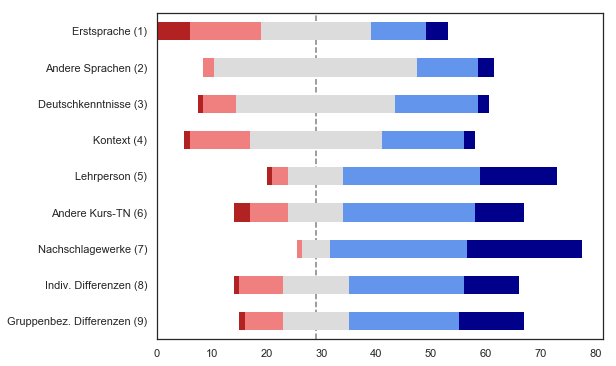

In [41]:
graf_likert(Daten_A[Daten_A != 0],6)

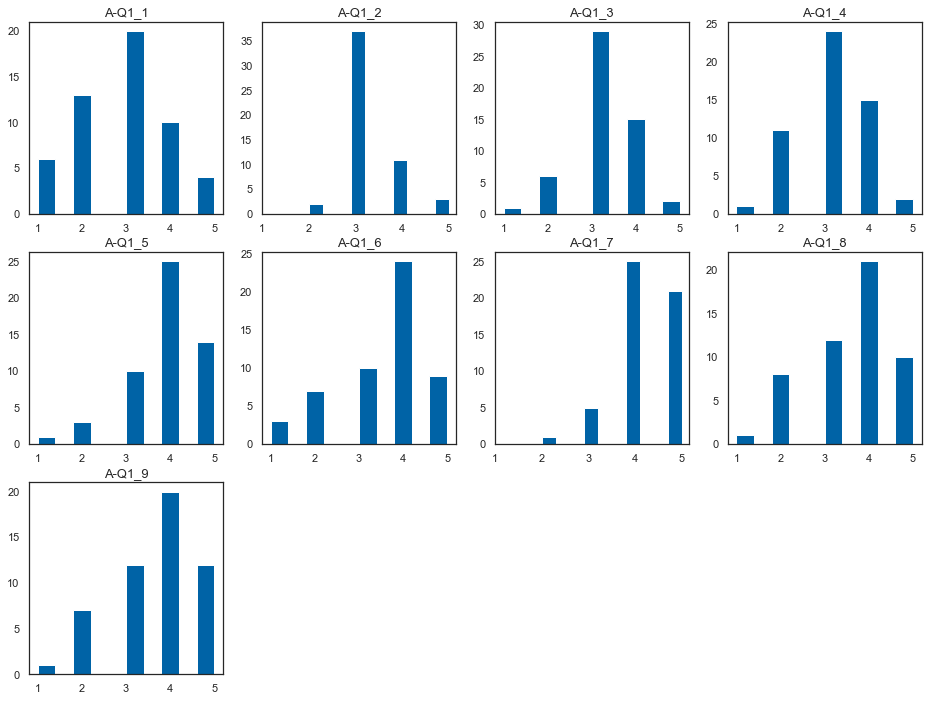

In [95]:
graf_hist(Daten,Liste_A_Q1,16,12,3,4)

In [96]:
Daten[Daten[Liste_A_Q1] != 0][Liste_A_Q1].mean().sort_values(ascending = False)

A-Q1_7    4.269231
A-Q1_5    3.905660
A-Q1_9    3.673077
A-Q1_8    3.596154
A-Q1_6    3.547170
A-Q1_2    3.283019
A-Q1_3    3.207547
A-Q1_4    3.113208
A-Q1_1    2.867925
dtype: float64

In [97]:
Daten[Daten[Liste_A_Q1] != 0][Liste_A_Q1].median()

A-Q1_1    3.0
A-Q1_2    3.0
A-Q1_3    3.0
A-Q1_4    3.0
A-Q1_5    4.0
A-Q1_6    4.0
A-Q1_7    4.0
A-Q1_8    4.0
A-Q1_9    4.0
dtype: float64

In [98]:
Daten[Daten[Liste_A_Q1] != 0][Liste_A_Q1].mode().T

,0
A-Q1_1,3.0
A-Q1_2,3.0
A-Q1_3,3.0
A-Q1_4,3.0
A-Q1_5,4.0
A-Q1_6,4.0
A-Q1_7,4.0
A-Q1_8,4.0
A-Q1_9,4.0


Korrelation in A-Q1:

In [99]:
df_spearman(Daten[Daten[Liste_A_Q1] != 0],Liste_A_Q1)

,A-Q1_1,A-Q1_2,A-Q1_3,A-Q1_4,A-Q1_5,A-Q1_6,A-Q1_7,A-Q1_8,A-Q1_9
A-Q1_1,1,0.132522,0.0694601,0.125091,0.224447,0.193484,0.0113917,-0.0819289,-0.031375
A-Q1_2,0.132522,1,0.301309,0.306467,0.495217,0.0970746,0.1639,0.0551753,0.0816443
A-Q1_3,0.0694601,0.301309,1,0.487412,0.167133,0.0626609,-0.12111,0.206122,0.16393
A-Q1_4,0.125091,0.306467,0.487412,1,0.131262,-0.154285,-0.14318,0.242275,0.302704
A-Q1_5,0.224447,0.495217,0.167133,0.131262,1,0.330421,0.11638,-0.058213,0.0229288
A-Q1_6,0.193484,0.0970746,0.0626609,-0.154285,0.330421,1,-0.0213172,0.0203207,-0.0308353
A-Q1_7,0.0113917,0.1639,-0.12111,-0.14318,0.11638,-0.0213172,1,-0.125088,0.0936706
A-Q1_8,-0.0819289,0.0551753,0.206122,0.242275,-0.058213,0.0203207,-0.125088,1,0.514446
A-Q1_9,-0.031375,0.0816443,0.16393,0.302704,0.0229288,-0.0308353,0.0936706,0.514446,1


In [100]:
df_spearman_pv(Daten[Daten[Liste_A_Q1] != 0],Liste_A_Q1)

,A-Q1_1,A-Q1_2,A-Q1_3,A-Q1_4,A-Q1_5,A-Q1_6,A-Q1_7,A-Q1_8,A-Q1_9
A-Q1_1,0,0.344172,0.621153,0.372139,0.106154,0.165091,0.616355,0.877569,0.859656
A-Q1_2,0.344172,0,0.0283445,0.0256202,0.000163291,0.489253,0.315808,0.791592,0.653202
A-Q1_3,0.621153,0.0283445,0,0.000214267,0.231632,0.655786,0.216381,0.316805,0.463875
A-Q1_4,0.372139,0.0256202,0.000214267,0,0.348822,0.270006,0.50806,0.0488795,0.0153601
A-Q1_5,0.106154,0.000163291,0.231632,0.348822,0,0.0156732,0.757146,0.404862,0.773095
A-Q1_6,0.165091,0.489253,0.655786,0.270006,0.0156732,0,0.715061,0.957699,0.697437
A-Q1_7,0.616355,0.315808,0.216381,0.50806,0.757146,0.715061,0,0.703568,0.279909
A-Q1_8,0.877569,0.791592,0.316805,0.0488795,0.404862,0.957699,0.703568,0,2.57162e-05
A-Q1_9,0.859656,0.653202,0.463875,0.0153601,0.773095,0.697437,0.279909,2.57162e-05,0


Biplot für Items 1 bis 7:

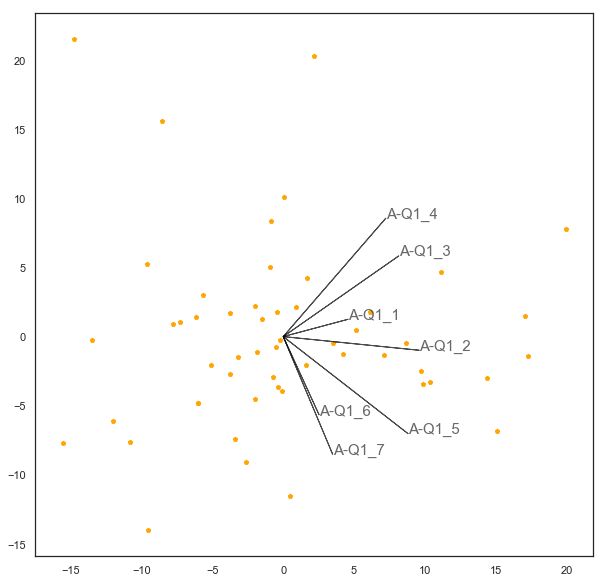

In [101]:
graf_cplot(Daten[Liste_A_Q1[:7]],6,1)

Anmerkungen:

In [102]:
Daten[Daten['A-Q1a']!=0]['A-Q1a']

6     Muchas veces funciona la intuición lingüística...
13    Los estudiantes que han hecho ERASMUS o Tandem...
20    Punkt 4 nicht klar verständlich: meine Antwort...
43    Doy clase en los niveles A1, A2 y B1. En estos...
Name: A-Q1a, dtype: object

In [103]:
Daten.loc[6]['A-Q1a']

'Muchas veces funciona la intuición lingüística (Sprachgefühl)'

In [104]:
Daten.loc[13]['A-Q1a']

'Los estudiantes que han hecho ERASMUS o Tandem generalmente son más autónomos y por ello utilizan las primeras cuatro estrategias.'

In [105]:
Daten.loc[20]['A-Q1a']

'Punkt 4 nicht klar verständlich: meine Antwort bezieht sich auf den INHALTL. KONTEXT, nicht auf Syntax'

In [106]:
Daten.loc[43]['A-Q1a']

'Doy clase en los niveles A1, A2 y B1. En estos niveles los alumnos usan todavía mucho su lengua materna para averiguar el significado de las palabras'

### Erschließungsstrategien im Unterricht

#### B-Q1 (32 Einzelstrategien)

Items:
1. Unbekannte deutsche Wörter mit gleich oder ähnlich geschriebenen Wörtern in der Muttersprache vergleichen
2. Unbekannte deutsche Wörter mit gleich oder ähnlich geschriebenen Wörtern in Englisch vergleichen (z.B. dt. Licht - engl. light)
3. Unbekannte deutsche Wörter mit gleich oder ähnlich geschriebenen Wörtern in anderen Sprachen vergleichen. Optional: Wenn Sie eine oder mehrere bestimmte Sprachen dafür empfehlen, können Sie sie hier angeben:
4. Klangbild aktivieren, z.B. durch leises Vorsprechen oder Vorstellen des Klanges, um ähnlich klingende Wörter in der Muttersprache oder einer anderen Sprache zu finden (z.B. dt. Haus - engl. house)
5. Kenntnisse über Lautentsprechungen zwischen Deutsch und anderen (germanischen) Sprachen und/oder über die historische Entwicklung der deutschen Sprache nutzen (z.B. engl. d - dt. t: day - Tag, p – f: hope – hoffen, ship - Schiff)
6. Wissen über die Wortbildungsregeln des Deutschen nutzen (z.B. Kompositabildung, typische Endungen für bestimmte Wortarten)
7. Aus Teilbedeutung zusammengesetzter Wörter (z.B. Stamm, Prä- und Suffixe, Teile von Komposita) auf die Gesamtbedeutung schließen
8. Wissen über Bestandteile von Wörtern, die grammatische Funktionen anzeigen, nutzen (z.B. Plural oder Kasusmarkierungen für Substantive, typische Endungen von Verben in verschiedenen Zeitformen/Tempora etc.)
9. Wissen über orthografische Regeln des Deutschen nutzen (z.B. Großschreibung der Substantive, Bindestriche in zusammengesetzten Wörtern, Punkt oder Komma als Strukturierungshilfen etc.)
10. Wissen über die Satzstellung im Deutschen nutzen (z.B. Personalform des Verbes an zweiter Position im Satz, Verbal/Satzklammer etc.)
11. Den grammatikalischen Aufbau von (Teil-)Sätzen analysieren, um Verbindungen zwischen bekannten und unbekannten Wörtern zu finden
12. Die semantischen Beziehungen zwischen bekannten und unbekannten Wörtern analysieren
13. Systematische lexikalische Beziehungen wie Synonyme, Antonyme, Reihungen, Über- und Unterbegriffe beachten
14. Verwendung von Konnektoren und anderen Mitteln der Textverbindung wie Pronomen, Adverbien etc. beachten
15. Erklärungshilfen im Text wie Paraphrasen, Definitionen, Erklärungen, Beispiele etc., die das unbekannte Wort umschreiben oder erklären, nutzen
16. Logische Zusammenhänge im Text nutzen (z.B. Ursache – Wirkung, vorher – nachher etc.)
17. Textsortenwissen nutzen
18. Wissen über das im Text behandelte Thema nutzen
19. Kulturspezifisches und landeskundliches Wissen nutzen (z.B. Namen berühmter Persönlichkeiten, geographische oder politische Informationen)
20. Gesunden Menschenverstand und allgemeines Weltwissen nutzen
21. Format und visuelle Textgestalt beachten (z.B. Layout, Schriftart und -größe, Hervorhebungen etc.)
22. Bilder, Grafiken, Diagramme, audiovisuelle Elemente (auf Internetseiten) etc. nutzen
23. Zahlen oder andere verständliche Zeichen nutzen
24. Wissen über die Kommunikationssituation oder den Kontext der Veröffentlichung nutzen (z.B. Ort, Zeit, Situation, in der ein Text gefunden wurde)
25. Hyperlinks beim Erschließen von unbekannten Wörtern in Texten im Internet nutzen
26. Verschiedene Strategien kombinieren, um die Erschließung unbekannter Wörter abzusichern
27. Erschließungsstrategien situationsabhängig einsetzen, z.B. nach Textsorte oder Schwierigkeitsgrad der Texte
32. Kenntnisse von Internationalismen nutzen (z.B. Akademie, Kaffee, Transport)
33. Andere:
34. Keine

Anzahl der gewählten Items:

In [107]:
Daten[Liste_B_Q1].sum(axis=1).describe()

count    53.000000
mean     17.830189
std       5.992739
min       4.000000
25%      14.000000
50%      17.000000
75%      22.000000
max      28.000000
dtype: float64

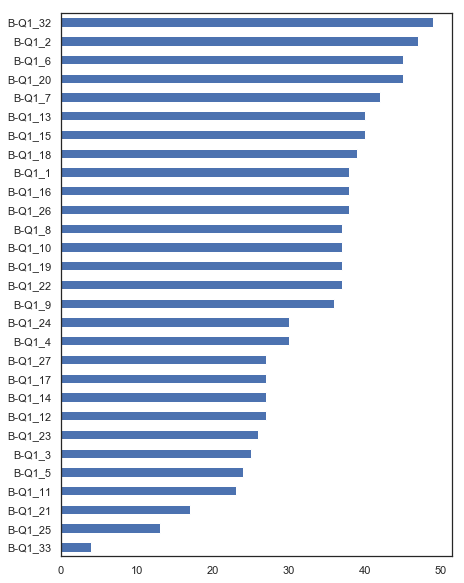

In [108]:
Daten[Liste_B_Q1].sum(axis=0).sort_values(ascending=True).plot(kind='barh', figsize=(7,10));

In [109]:
Daten[Liste_B_Q1].sum(axis=0).sort_values(ascending=False)

B-Q1_32    49
B-Q1_2     47
B-Q1_6     45
B-Q1_20    45
B-Q1_7     42
B-Q1_13    40
B-Q1_15    40
B-Q1_18    39
B-Q1_1     38
B-Q1_16    38
B-Q1_26    38
B-Q1_8     37
B-Q1_10    37
B-Q1_19    37
B-Q1_22    37
B-Q1_9     36
B-Q1_24    30
B-Q1_4     30
B-Q1_27    27
B-Q1_17    27
B-Q1_14    27
B-Q1_12    27
B-Q1_23    26
B-Q1_3     25
B-Q1_5     24
B-Q1_11    23
B-Q1_21    17
B-Q1_25    13
B-Q1_33     4
dtype: int64

Angaben bei "Andere" (33):

In [110]:
Daten[Daten['B-Q1_33_TEXT']!=0]['B-Q1_33_TEXT']

13                         demostrar imágenes en la red
20    Präpositions- u. Morphementsprechungen, z.B. P...
29                          Aplicaciones de traducción 
47                                        Gesticulación
Name: B-Q1_33_TEXT, dtype: object

In [111]:
Daten.loc[20]['B-Q1_33_TEXT']

'Präpositions- u. Morphementsprechungen, z.B. Präfix+Präp. VOR(-): PRE-, ANTE, ANTEs, delANTE; beFORe (temp.+lokal), oder: AUS(-): EX-; OUT (engl. "EX-IT" "Aus-gang") etc.: das alles bereits in A1'

Anmerkungen:

In [112]:
Daten[Daten['B-Q1a']!=0]['B-Q1a']

3     Las estrategias varían dependiendo del nivel d...
10    Eine Übung die ich gerne mache: MArkiere alle ...
13    Utilizo diccionarios en la red para analizar l...
20    stark abhängig von der Vorbildung der KTN (übr...
41    Estoy muy contenta de utilizar sin haber refle...
47    Lo de utilizar enlaces de internet puede depen...
Name: B-Q1a, dtype: object

In [113]:
Daten.loc[3]['B-Q1a']

'Las estrategias varían dependiendo del nivel de Alemán (en el nivel A las estrategias a las que recurro son menos variadas que en el nivel B2 o C1)'

In [114]:
Daten.loc[10]['B-Q1a']

'Eine Übung die ich gerne mache: MArkiere alle Wörter in dem Text, DIE DU KENNST. Auch Teile von Wörtern. Das ist die einzige Übung, bei der ich meine Studenten beobachtet habe, aktiv Erschließungsstrategien zu nutzen - selbst wenn ich versuche ihnen andere Möglichkeiten zu zeigen! '

In [115]:
Daten.loc[13]['B-Q1a']

'Utilizo diccionarios en la red para analizar las diferencias con el formato libro y para el audio y la proncunciación.'

In [116]:
Daten.loc[20]['B-Q1a']

'stark abhängig von der Vorbildung der KTN (übrigens nicht "DeutschSTUDIERENDE", denn bei uns sind nicht alle an der Uni immatrikuliert), sondern "Deutsch-LERNENDE"): Lateinkenntnisse (nützlich bei Lexik, aber vor allem auch Gramm.) immer seltener u. dürftiger; Englischkenntn. gravierend unterschiedlich: die Naturwissenschaftler können besser Englisch als viele Anglisten!'

In [117]:
Daten.loc[41]['B-Q1a']

'Estoy muy contenta de utilizar sin haber reflexionado en ello estrategias tan variadas.'

In [118]:
Daten.loc[47]['B-Q1a']

'Lo de utilizar enlaces de internet puede depender de las instalaciones del centro.'

#### B-Q2 (Methoden)

Items:
1. Erschließungsstrategien werden im Unterricht vorgestellt (und erklärt).
2. Die Lernenden bekommen Tipps für das selbstständige Aneignen von Erschließungsstrategien, z.B. über Internetseiten, Bücher oder andere Materialien, in denen Lernstrategien erklärt werden.
3. Erschließungsstrategien werden anhand von praktischen Beispielen, beim Ausführen bestimmter Aufgaben (z.B. Lesen eines schwierigen Textes) erklärt und geübt.
4. Verschiedene Erschließungsstrategien werden ausprobiert und miteinander verglichen.
5. Reflexionen über Einsatz von Erschließungsstrategien werden durchgeführt, z.B. darüber, welche Strategie in einer bestimmten Situation und/oder für eine bestimmte Person geeignet ist.
6. Die Lernenden erwerben Erschließungsstrategien unbewusst im Laufe des Unterrichts, z.B. beim Lesen von schwierigen Texten - ohne explizite Erklärungen oder Hinweise dazu.

8. Die Lernenden werden zu ihren Vorkenntnissen befragt, z.B. welche Erschließungsstrategien sie bereits kennen und/oder anwenden können.

(Item 7 (Andere) wurde aufgrund von technischen Problemen bei der Pilotierung entfernt und durch eine Kommentarfunktion ersetzt.)

Übersicht über gewählte Antwortoptionen:

In [119]:
BQ2_Lk = Daten[Liste_B_Q2].T.apply(pd.value_counts).fillna(0).astype(integer)
BQ2_Lk = BQ2_Lk.T
BQ2_Lk.drop(0, axis=1, inplace=True)
BQ2_Lk

,1,2,3,4,5
0,5,0,1,1,0
1,0,3,2,1,1
2,0,3,1,3,0
3,1,0,0,1,5
4,0,0,2,4,1
5,4,1,1,1,0
6,0,1,2,1,3
7,0,4,1,1,1
8,0,1,4,2,0
9,0,0,1,3,3


In [120]:
df_describe1(Daten[Daten[Liste_B_Q2] != 0],Liste_B_Q2)

,count,mean,std,min,25%,50%,75%,max,median,kurtosis,skew
B-Q2_1,52.0,3.442308,1.036840,1.0,3.0,3.0,4.0,5.0,3.0,-0.656473,0.105182
B-Q2_2,53.0,3.169811,1.340721,1.0,2.0,3.0,4.0,5.0,3.0,-1.037152,-0.173125
B-Q2_3,53.0,3.584906,1.150818,1.0,3.0,4.0,5.0,5.0,4.0,-0.744777,-0.373038
B-Q2_4,53.0,2.886792,1.250544,1.0,2.0,3.0,4.0,5.0,3.0,-0.909441,0.037762
B-Q2_5,53.0,2.584906,1.183768,1.0,2.0,2.0,3.0,5.0,2.0,-0.830888,0.295552
B-Q2_6,53.0,3.113208,1.137818,1.0,3.0,3.0,4.0,5.0,3.0,-0.468681,-0.474039
B-Q2_8,53.0,3.264151,1.346662,1.0,2.0,3.0,4.0,5.0,3.0,-1.082619,-0.259464


In [121]:
#df_describe1(Daten[Daten[Liste_B_Q2] != 0],Liste_B_Q2).to_excel('D:\Daten\DISS\Daten\Deskriptiv_Lehrende_B2.xlsx')

In [122]:
Daten[Daten[Liste_B_Q2] != 0][Liste_B_Q2].mean().sort_values(ascending = False)

B-Q2_3    3.584906
B-Q2_1    3.442308
B-Q2_8    3.264151
B-Q2_2    3.169811
B-Q2_6    3.113208
B-Q2_4    2.886792
B-Q2_5    2.584906
dtype: float64

In [123]:
Daten[Daten[Liste_B_Q2] != 0][Liste_B_Q2].mode().T

,0,1
B-Q2_1,3.0,NaN
B-Q2_2,3.0,NaN
B-Q2_3,4.0,NaN
B-Q2_4,3.0,NaN
B-Q2_5,2.0,NaN
B-Q2_6,3.0,4.0
B-Q2_8,4.0,NaN


In [39]:
Daten_B2 = Daten[:][Liste_B_Q2]
Daten_B2.apply(pd.value_counts).fillna(0).astype(int).T

,0,1,2,3,4,5
B-Q2_1,1,1,7,23,10,11
B-Q2_2,0,8,8,15,11,11
B-Q2_3,0,2,8,14,15,14
B-Q2_4,0,9,11,16,11,6
B-Q2_5,0,11,16,13,10,3
B-Q2_6,0,7,6,18,18,4
B-Q2_8,0,7,9,12,13,12


In [45]:
#Daten_B2.apply(pd.value_counts).fillna(0).astype(int).T.to_excel('D:\Daten\DISS\Daten\Total_B2L.xlsx')

In [43]:
table_porc(Daten_B2[Daten_B2 != 0])

,1.0,2.0,3.0,4.0,5.0,n
B-Q2_1,1.923077,13.461538,44.230769,19.230769,21.153846,52
B-Q2_2,15.094340,15.094340,28.301887,20.754717,20.754717,53
B-Q2_3,3.773585,15.094340,26.415094,28.301887,26.415094,53
B-Q2_4,16.981132,20.754717,30.188679,20.754717,11.320755,53
B-Q2_5,20.754717,30.188679,24.528302,18.867925,5.660377,53
B-Q2_6,13.207547,11.320755,33.962264,33.962264,7.547170,53
B-Q2_8,13.207547,16.981132,22.641509,24.528302,22.641509,53


In [46]:
#table_porc(Daten_B2[Daten_B2 != 0]).to_excel('D:\Daten\DISS\Daten\Porc_B2L.xlsx')

In [43]:
Daten_B2.rename(columns={'B-Q2_1':'Vorstellung (1)',
                        'B-Q2_2':'Tipps zur selb. Aneignung (2)',
                        'B-Q2_3':'Üben mit Beispielen (3)',
                        'B-Q2_4':'Vergleichen (4)',
                        'B-Q2_5':'Reflexion (5)',
                        'B-Q2_6':'Unbewusst (6)',                        
                        'B-Q2_8':'Befragung zu Vorkenntnissen (8)'}, inplace=True)
Daten_B2 = Daten_B2.iloc[:, ::-1]

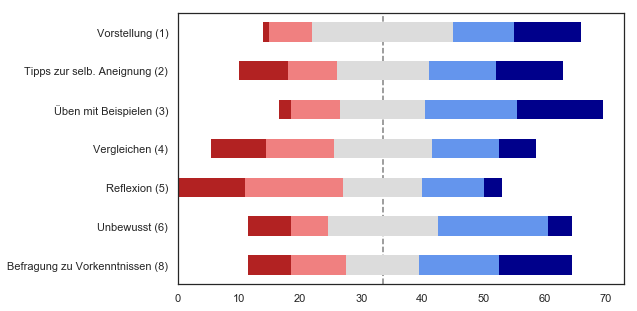

In [44]:
graf_likert(Daten_B2[Daten_B2 != 0],5)

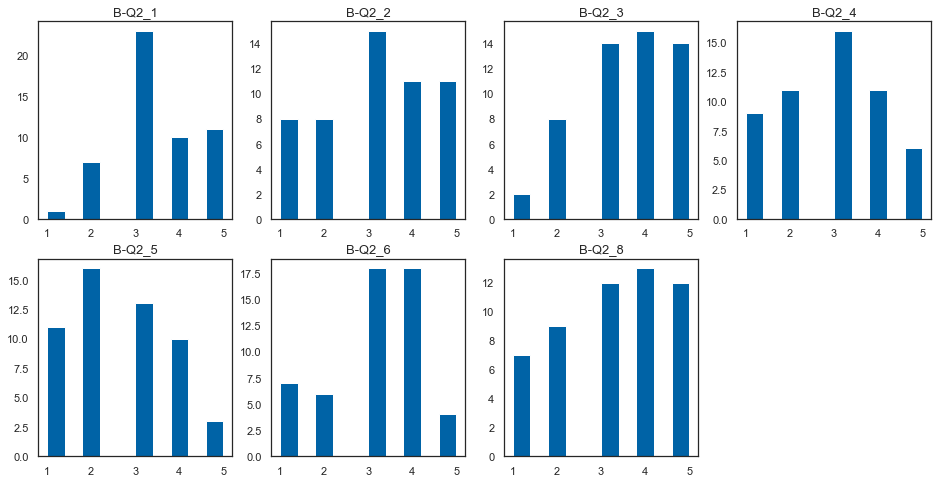

In [125]:
graf_hist(Daten,Liste_B_Q2,16,8,2,4)

Korrelation in B-Q2:

In [126]:
df_spearman(Daten[Daten[Liste_B_Q2] != 0],Liste_B_Q2)

,B-Q2_1,B-Q2_2,B-Q2_3,B-Q2_4,B-Q2_5,B-Q2_6,B-Q2_8
B-Q2_1,1,0.27638,0.523844,0.45899,0.421612,-0.331346,0.342885
B-Q2_2,0.27638,1,0.410764,0.534444,0.539396,-0.15774,0.43376
B-Q2_3,0.523844,0.410764,1,0.537399,0.446591,-0.217229,0.343681
B-Q2_4,0.45899,0.534444,0.537399,1,0.745484,-0.123381,0.613925
B-Q2_5,0.421612,0.539396,0.446591,0.745484,1,-0.1241,0.519677
B-Q2_6,-0.331346,-0.15774,-0.217229,-0.123381,-0.1241,1,0.0274933
B-Q2_8,0.342885,0.43376,0.343681,0.613925,0.519677,0.0274933,1


In [127]:
df_spearman_pv(Daten[Daten[Liste_B_Q2] != 0],Liste_B_Q2)

,B-Q2_1,B-Q2_2,B-Q2_3,B-Q2_4,B-Q2_5,B-Q2_6,B-Q2_8
B-Q2_1,0,0.102579,6.91498e-05,0.00208208,0.0040907,0.00641921,0.0102863
B-Q2_2,0.102579,0,0.00224926,3.7548e-05,3.07801e-05,0.259294,0.00117553
B-Q2_3,6.91498e-05,0.00224926,0,3.33616e-05,0.000802154,0.11818,0.0117475
B-Q2_4,0.00208208,3.7548e-05,3.33616e-05,0,1.52002e-10,0.378764,1.01484e-06
B-Q2_5,0.0040907,3.07801e-05,0.000802154,1.52002e-10,0,0.375968,6.66993e-05
B-Q2_6,0.00641921,0.259294,0.11818,0.378764,0.375968,0,0.845066
B-Q2_8,0.0102863,0.00117553,0.0117475,1.01484e-06,6.66993e-05,0.845066,0


Anmerkungen:

In [128]:
Daten[Daten['B-Q2a']!=0]['B-Q2a']

3                                   Para el nivel B2/C1
13    Las estrategias se trabajan una vez en profund...
20    "Erschliessen", spezifisch für unsere Traditio...
26    Unterricht Niveau A1-B1, Sprachunterricht mit ...
41    No reflexionamos sobre las estrategias, más bi...
47    Las estrategias de inferencia son distintas se...
Name: B-Q2a, dtype: object

In [129]:
Daten.loc[13]['B-Q2a']

'Las estrategias se trabajan una vez en profundidad, luego solamente los recuerdo cuando veo que no se utilizan.'

In [130]:
Daten.loc[20]['B-Q2a']

'"Erschliessen", spezifisch für unsere Tradition, muss den zum Auswendiglernen dressierten spanischen Lernern erst nahegebracht werden'

In [131]:
Daten.loc[26]['B-Q2a']

'Unterricht Niveau A1-B1, Sprachunterricht mit Fokus auf Tourismus. Relativ wenig arbeiten mit langen Texten. Meist reduziert auf Lehrwerkstexte. '

In [132]:
Daten.loc[41]['B-Q2a']

'No reflexionamos sobre las estrategias, más bien se presentan sobre la misma práctica para que puedan resolver con éxito los problemas comunicativos.'

In [133]:
Daten.loc[47]['B-Q2a']

'Las estrategias de inferencia son distintas según el nivel. En un nivel A se aplican más aquellas estrategias contrastivas, las que comparan el alemán con la L1 u otras lenguas que habla el alumno. A partir del Nivel B se usan más estrategias basadas en la Morfología (Wortbilding) o la función sintáctica en la oración. En los Niveles C se utilizarían más estrategias de contenido semántico.'

#### B-Q3 (Quellen und Material)

Items:
1. Erschließungsstrategien wurden im Rahmen meiner Ausbildung thematisiert.
2. Erschließungsstrategien wurden im Rahmen meiner Lehrerausbildung thematisiert.
3. Erschließungsstrategien wurden in Fortbildungsveranstaltungen, die ich besucht habe, thematisiert.
4. In den Lehrwerken, die ich verwende, werden Erschließungsstrategien thematisiert.
5. In den Lehrerhandbüchern zu den Lehrwerken, die ich verwende, werden Erschließungsstrategien thematisiert.
6. Ich nutze Internetseiten oder -blogs, auf denen Erschließungsstrategien thematisiert werden.
7. Ich nutze didaktische Handbücher, Zeitschriften oder andere Materialien, in denen Erschließungsstrategien thematisiert werden.
8. Ich habe selbst Material zum Thema Erschließungsstrategien entwickelt.

Übersicht über gewählte Antwortoptionen:

In [134]:
BQ3_Lk = Daten[Liste_B_Q3].T.apply(pd.value_counts).fillna(0).astype(integer)
BQ3_Lk = BQ3_Lk.T
BQ3_Lk.drop(0, axis=1, inplace=True)
BQ3_Lk

,1,2,3,4,5
0,4,0,2,2,0
1,2,3,3,0,0
2,1,6,1,0,0
3,2,0,1,1,2
4,2,0,1,0,5
5,5,2,1,0,0
6,0,1,3,3,1
7,1,2,1,3,1
8,1,1,2,1,3
9,1,3,3,1,0


In [135]:
df_describe1(Daten[Daten[Liste_B_Q3] != 0],Liste_B_Q3)

,count,mean,std,min,25%,50%,75%,max,median,kurtosis,skew
B-Q3_1,53.0,2.547170,1.136222,1.0,2.0,2.0,3.0,5.0,2.0,-0.246674,0.492102
B-Q3_2,51.0,2.607843,1.327832,1.0,2.0,2.0,3.0,5.0,2.0,-0.791010,0.504945
B-Q3_3,52.0,2.576923,1.391094,1.0,1.0,2.0,4.0,5.0,2.0,-1.168304,0.403009
B-Q3_4,53.0,2.962264,1.159613,1.0,2.0,3.0,4.0,5.0,3.0,-0.623253,0.075858
B-Q3_5,48.0,2.895833,1.275624,1.0,2.0,3.0,4.0,5.0,3.0,-0.983616,0.074379
B-Q3_6,50.0,2.240000,1.333401,1.0,1.0,2.0,3.0,5.0,2.0,-0.162064,0.937797
B-Q3_7,52.0,2.846154,1.334087,1.0,2.0,3.0,4.0,5.0,3.0,-1.093429,0.241186
B-Q3_8,51.0,2.764706,1.491150,1.0,1.0,3.0,4.0,5.0,3.0,-1.442155,0.120178


In [136]:
#df_describe1(Daten[Daten[Liste_B_Q3] != 0],Liste_B_Q3).to_excel('D:\Daten\DISS\Daten\Deskriptiv_Lehrende_B3.xlsx')

In [137]:
Daten[Daten[Liste_B_Q3] != 0][Liste_B_Q3].mean().sort_values(ascending = False)

B-Q3_4    2.962264
B-Q3_5    2.895833
B-Q3_7    2.846154
B-Q3_8    2.764706
B-Q3_2    2.607843
B-Q3_3    2.576923
B-Q3_1    2.547170
B-Q3_6    2.240000
dtype: float64

In [138]:
Daten[Daten[Liste_B_Q3] != 0][Liste_B_Q3].mode().T

,0,1
B-Q3_1,2.0,3.0
B-Q3_2,2.0,NaN
B-Q3_3,1.0,NaN
B-Q3_4,3.0,NaN
B-Q3_5,3.0,NaN
B-Q3_6,1.0,NaN
B-Q3_7,2.0,NaN
B-Q3_8,1.0,NaN


In [139]:
for col in Liste_B_Q3:
    print(Daten[Daten[col] >= 3].shape[0])

26
24
23
35
29
17
28
28


In [48]:
Daten_B3 = Daten[:][Liste_B_Q3]
Daten_B3.apply(pd.value_counts).fillna(0).astype(int).T

,0,1,2,3,4,5
B-Q3_1,0,10,17,17,5,4
B-Q3_2,2,12,15,12,5,7
B-Q3_3,1,15,14,7,10,6
B-Q3_4,0,6,12,19,10,6
B-Q3_5,5,8,11,13,10,6
B-Q3_6,3,19,14,9,2,6
B-Q3_7,1,9,15,11,9,8
B-Q3_8,2,16,7,9,11,8


In [49]:
#Daten_B3.apply(pd.value_counts).fillna(0).astype(int).T.to_excel('D:\Daten\DISS\Daten\Total_B3L.xlsx')

In [50]:
table_porc(Daten_B3[Daten_B3 != 0])

,1,2,3,4,5,n
B-Q3_1,18.867925,32.075472,32.075472,9.433962,7.547170,53
B-Q3_2,23.529412,29.411765,23.529412,9.803922,13.725490,51
B-Q3_3,28.846154,26.923077,13.461538,19.230769,11.538462,52
B-Q3_4,11.320755,22.641509,35.849057,18.867925,11.320755,53
B-Q3_5,16.666667,22.916667,27.083333,20.833333,12.500000,48
B-Q3_6,38.000000,28.000000,18.000000,4.000000,12.000000,50
B-Q3_7,17.307692,28.846154,21.153846,17.307692,15.384615,52
B-Q3_8,31.372549,13.725490,17.647059,21.568627,15.686275,51


In [51]:
#table_porc(Daten_B3[Daten_B3 != 0]).to_excel('D:\Daten\DISS\Daten\Porc_B3L.xlsx')

In [46]:
Daten_B3.rename(columns={'B-Q3_1':'Ausbildung (1)',
                        'B-Q3_2':'Lehrerausbildung (2)',
                        'B-Q3_3':'Fortbildung (3)',
                        'B-Q3_4':'Lehrwerke (4)',
                        'B-Q3_5':'Lehrerhandbücher (5)',
                        'B-Q3_6':'Internet (6)',                        
                        'B-Q3_7':'Didakt. Literatur (7)',
                        'B-Q3_8':'Selbst erstelltes Material (8)'}, inplace=True)
Daten_B3 = Daten_B3.iloc[:, ::-1]

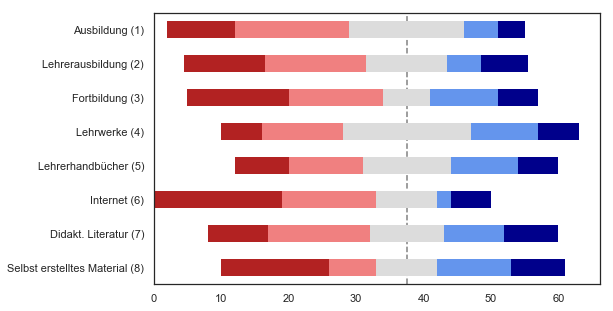

In [47]:
graf_likert(Daten_B3[Daten_B3 != 0],5)

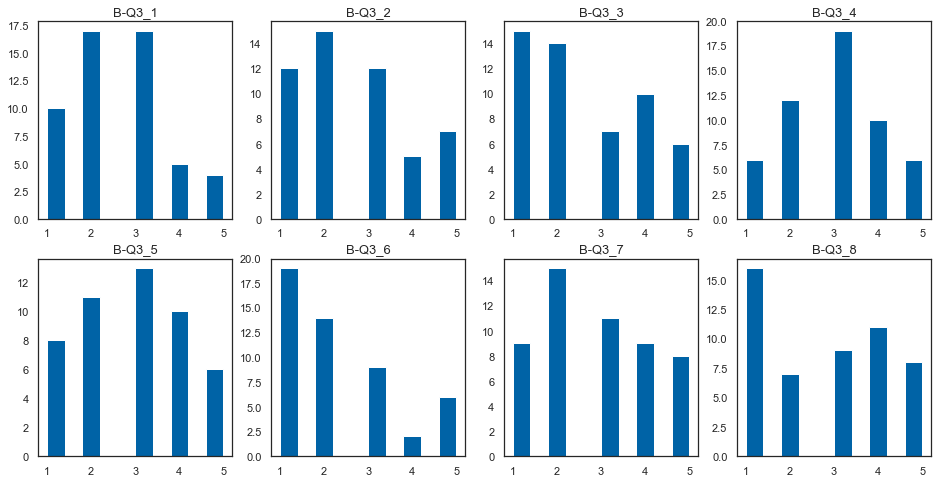

In [141]:
graf_hist(Daten,Liste_B_Q3,16,8,2,4)

Korrelation in B-Q3:

In [142]:
df_spearman(Daten[Daten[Liste_B_Q3] != 0],Liste_B_Q3)

,B-Q3_1,B-Q3_2,B-Q3_3,B-Q3_4,B-Q3_5,B-Q3_6,B-Q3_7,B-Q3_8
B-Q3_1,1,0.434895,0.0207802,0.301737,0.179788,0.0644735,0.0247883,-0.150047
B-Q3_2,0.434895,1,0.593184,0.515163,0.547967,0.226434,0.230237,-0.0411164
B-Q3_3,0.0207802,0.593184,1,0.411301,0.478212,0.301138,0.250154,0.280007
B-Q3_4,0.301737,0.515163,0.411301,1,0.851149,0.186848,0.360745,-0.0163883
B-Q3_5,0.179788,0.547967,0.478212,0.851149,1,0.381031,0.462251,0.0269438
B-Q3_6,0.0644735,0.226434,0.301138,0.186848,0.381031,1,0.618171,0.132114
B-Q3_7,0.0247883,0.230237,0.250154,0.360745,0.462251,0.618171,1,0.207093
B-Q3_8,-0.150047,-0.0411164,0.280007,-0.0163883,0.0269438,0.132114,0.207093,1


In [143]:
df_spearman_pv(Daten[Daten[Liste_B_Q3] != 0],Liste_B_Q3)

,B-Q3_1,B-Q3_2,B-Q3_3,B-Q3_4,B-Q3_5,B-Q3_6,B-Q3_7,B-Q3_8
B-Q3_1,0,0.000368979,0.773811,0.0281097,0.240072,0.747754,0.750762,0.482454
B-Q3_2,0.000368979,0,0.000639125,0.000751643,0.000828584,0.2053,0.137093,0.55501
B-Q3_3,0.773811,0.000639125,0,0.00752098,0.00440413,0.0237198,0.0326733,0.0521698
B-Q3_4,0.0281097,0.000751643,0.00752098,0,1.33324e-09,0.322888,0.0213597,0.735122
B-Q3_5,0.240072,0.000828584,0.00440413,1.33324e-09,0,0.00125485,0.00193484,0.446694
B-Q3_6,0.747754,0.2053,0.0237198,0.322888,0.00125485,0,1.29833e-07,0.0493534
B-Q3_7,0.750762,0.137093,0.0326733,0.0213597,0.00193484,1.29833e-07,0,0.0658903
B-Q3_8,0.482454,0.55501,0.0521698,0.735122,0.446694,0.0493534,0.0658903,0


Anmerkungen:

In [144]:
Daten[Daten['B-Q3a']!=0]['B-Q3a']

20    unbeantwortet: ich hatte nur eine akad., keine...
47    En cuanto al material propio puedo decir que s...
Name: B-Q3a, dtype: object

In [145]:
Daten.loc[20]['B-Q3a']

'unbeantwortet: ich hatte nur eine akad., keine pädagog., Ausbildung'

In [146]:
Daten.loc[47]['B-Q3a']

'En cuanto al material propio puedo decir que son más bien consejos que doy en clases.'

### Einstellung zu Erschließungsstrategien

#### C-Q1

Items:
1. Strategien zur Erschließung unbekannter Wörter sind ein wichtiges Thema in meinem Unterricht.
2. Die Thematisierung von Erschließungsstrategien ist im Anfängerunterricht besonders wichtig.
3. Die Thematisierung von Erschließungsstrategien ist in der Mittelstufe besonders wichtig.
4. Die Thematisierung von Erschließungsstrategien ist im Unterricht mit Fortgeschrittenen besonders wichtig.
5. Es ist nicht notwendig, Erschließungsstrategien explizit zu vermitteln, weil die Lernenden sie ohnehin unbewusst anwenden.
6. In meinem Unterricht wird mit anspruchsvollen Texten gearbeitet, bei denen die Lernenden auf den Einsatz von Erschließungsstrategien angewiesen sind.
7. Erschließungsstrategien sind nützlich, um den Wortschatz zu erweitern.
8. Erschließungsstrategien sind nützlich, um Texte besser verstehen zu können.
9. Ich verwende Material, das an das Niveau der Lernenden angepasst ist, sodass sie es auch ohne den Einsatz komplizierter Erschließungsstrategien verstehen können.
10. Durch die Förderung von Erschließungsstrategien kann autonomes Lernen gestärkt werden.

In [147]:
df_describe(Daten[Daten[Liste_C_Q1]!=0],Liste_C_Q1)

,count,mean,std,min,25%,50%,75%,max,mode,median,kurtosis,skew
C-Q1_1,52.0,3.692308,1.094343,2.0,3.0,4.0,5.0,5.0,4.0,4.0,-1.207856,-0.281733
C-Q1_2,53.0,4.000000,0.832050,2.0,3.0,4.0,5.0,5.0,4.0,4.0,-1.019608,-0.208164
C-Q1_3,52.0,3.788462,0.893035,2.0,3.0,4.0,4.0,5.0,4.0,4.0,-0.186411,-0.592577
C-Q1_4,53.0,3.811321,1.038797,2.0,3.0,4.0,5.0,5.0,5.0,4.0,-1.050678,-0.354459
C-Q1_5,53.0,2.113208,0.993447,1.0,1.0,2.0,3.0,4.0,2.0,2.0,-0.766893,0.499249
C-Q1_6,52.0,3.269231,1.190080,1.0,2.0,3.0,4.0,5.0,3.0,3.0,-0.942507,-0.040591
C-Q1_7,53.0,4.566038,0.537424,3.0,4.0,5.0,5.0,5.0,5.0,5.0,-0.782730,-0.658653
C-Q1_8,53.0,4.509434,0.639189,3.0,4.0,5.0,5.0,5.0,5.0,5.0,-0.107397,-0.954773
C-Q1_9,52.0,3.019231,1.038294,1.0,2.0,3.0,4.0,5.0,3.0,3.0,-0.554791,0.069733
C-Q1_10,53.0,4.566038,0.693637,2.0,4.0,5.0,5.0,5.0,5.0,5.0,2.793452,-1.682532


In [148]:
#df_describe(Daten[Daten[Liste_C_Q1]!=0],Liste_C_Q1).to_excel('D:\Daten\DISS\Daten\Deskriptiv_Lehrende_C1.xlsx')

In [52]:
Daten_C = Daten[:][Liste_C_Q1]
Daten_C.apply(pd.value_counts).fillna(0).astype(int).T

,0,1,2,3,4,5
C-Q1_1,1,0,10,11,16,15
C-Q1_2,0,0,1,15,20,17
C-Q1_3,1,0,6,9,27,10
C-Q1_4,0,0,7,13,16,17
C-Q1_5,0,17,19,11,6,0
C-Q1_6,1,3,12,15,12,10
C-Q1_7,0,0,0,1,21,31
C-Q1_8,0,0,0,4,18,31
C-Q1_9,1,3,14,18,13,4
C-Q1_10,0,0,1,3,14,35


In [53]:
#Daten_C.apply(pd.value_counts).fillna(0).astype(int).T.to_excel('D:\Daten\DISS\Daten\Total_C1L.xlsx')

In [54]:
table_porc(Daten_C[Daten_C != 0])

,1.0,2.0,3.0,4.0,5.0,n
C-Q1_1,0.000000,19.230769,21.153846,30.769231,28.846154,52
C-Q1_2,0.000000,1.886792,28.301887,37.735849,32.075472,53
C-Q1_3,0.000000,11.538462,17.307692,51.923077,19.230769,52
C-Q1_4,0.000000,13.207547,24.528302,30.188679,32.075472,53
C-Q1_5,32.075472,35.849057,20.754717,11.320755,0.000000,53
C-Q1_6,5.769231,23.076923,28.846154,23.076923,19.230769,52
C-Q1_7,0.000000,0.000000,1.886792,39.622642,58.490566,53
C-Q1_8,0.000000,0.000000,7.547170,33.962264,58.490566,53
C-Q1_9,5.769231,26.923077,34.615385,25.000000,7.692308,52
C-Q1_10,0.000000,1.886792,5.660377,26.415094,66.037736,53


In [55]:
#table_porc(Daten_C[Daten_C != 0]).to_excel('D:\Daten\DISS\Daten\Porc_C1L.xlsx')

In [49]:
Daten_C.rename(columns={'C-Q1_1':'Wichtig im DK (1)',
                        'C-Q1_2':'Anfänger... (2)',
                        'C-Q1_3':'Mittelstufe... (3)',
                        'C-Q1_4':'Fortgeschrittene... (4)',
                        'C-Q1_5':'Keine explizite Vermittlung nötig (5)',
                        'C-Q1_6':'Einsatz v. Str. im U. notwendig (6)',                        
                        'C-Q1_7':'Nützlich für Wortschatz (7)',
                        'C-Q1_8':'Nützlich für Textverstehen (8)',
                        'C-Q1_9':'Einsatz v. Str. nicht notwendig (9)',
                        'C-Q1_10':'Autonomieförderung (10)'}, inplace=True)
Daten_C = Daten_C.iloc[:, ::-1]

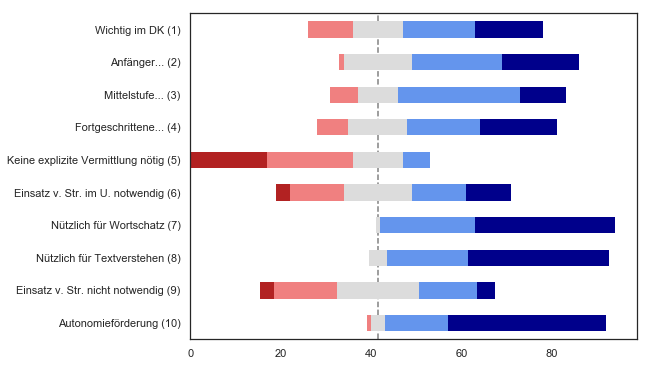

In [50]:
graf_likert(Daten_C[Daten_C != 0],6)

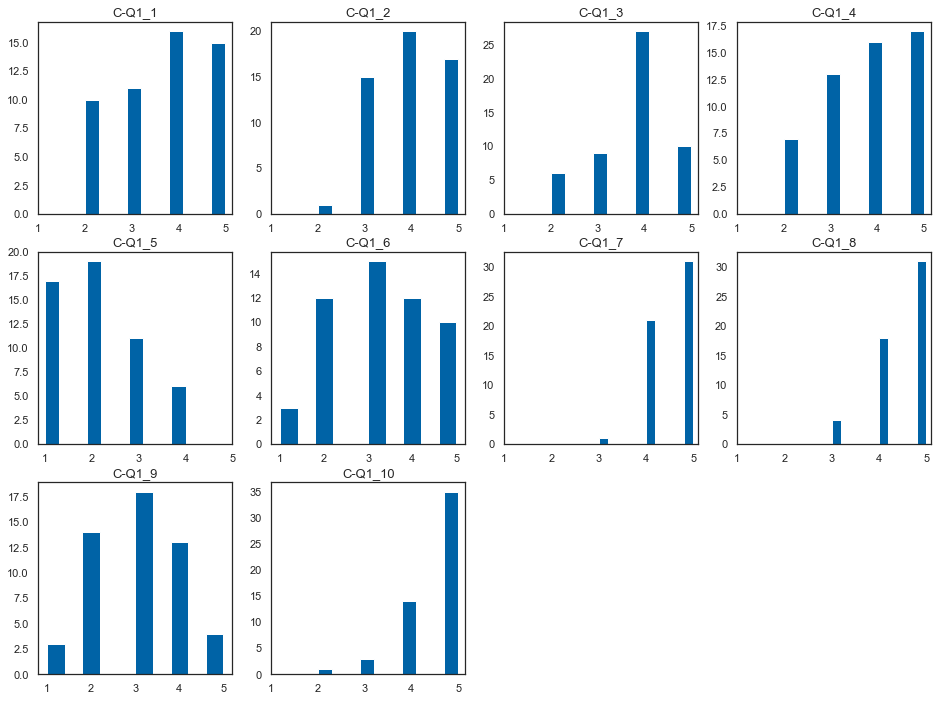

In [150]:
graf_hist(Daten,Liste_C_Q1,16,12,3,4)

Korrelation in C-Q1:

In [151]:
df_spearman(Daten[Daten[Liste_C_Q1] != 0],Liste_C_Q1)

,C-Q1_1,C-Q1_2,C-Q1_3,C-Q1_4,C-Q1_5,C-Q1_6,C-Q1_7,C-Q1_8,C-Q1_9,C-Q1_10
C-Q1_1,1,0.404433,0.378014,0.228963,-0.190894,0.481527,0.358985,0.372429,0.101855,0.227072
C-Q1_2,0.404433,1,0.220457,0.0113386,-0.384396,0.210657,0.245628,0.117595,-0.140895,0.105084
C-Q1_3,0.378014,0.220457,1,0.705619,-0.217321,0.218281,0.25107,0.0857023,0.137421,0.247122
C-Q1_4,0.228963,0.0113386,0.705619,1,-0.222977,0.0884984,0.243208,-0.0766385,0.300828,0.229262
C-Q1_5,-0.190894,-0.384396,-0.217321,-0.222977,1,-0.171248,-0.113642,-0.147711,-0.0389071,-0.123099
C-Q1_6,0.481527,0.210657,0.218281,0.0884984,-0.171248,1,0.242663,0.198931,0.0232935,0.153399
C-Q1_7,0.358985,0.245628,0.25107,0.243208,-0.113642,0.242663,1,0.421744,-0.0160373,0.465908
C-Q1_8,0.372429,0.117595,0.0857023,-0.0766385,-0.147711,0.198931,0.421744,1,-0.0768791,0.469086
C-Q1_9,0.101855,-0.140895,0.137421,0.300828,-0.0389071,0.0232935,-0.0160373,-0.0768791,1,-0.152804
C-Q1_10,0.227072,0.105084,0.247122,0.229262,-0.123099,0.153399,0.465908,0.469086,-0.152804,1


In [152]:
df_spearman_pv(Daten[Daten[Liste_C_Q1] != 0],Liste_C_Q1)

,C-Q1_1,C-Q1_2,C-Q1_3,C-Q1_4,C-Q1_5,C-Q1_6,C-Q1_7,C-Q1_8,C-Q1_9,C-Q1_10
C-Q1_1,0,0.00381323,0.027173,0.104512,0.107154,8.85426e-05,0.00582029,0.0185665,0.266347,0.0789299
C-Q1_2,0.00381323,0,0.230607,0.935776,0.00448606,0.144909,0.0762573,0.401692,0.323361,0.453941
C-Q1_3,0.027173,0.230607,0,1.83527e-07,0.285692,0.238735,0.0502264,0.424976,0.34276,0.0571779
C-Q1_4,0.104512,0.935776,1.83527e-07,0,0.108523,0.523883,0.0792908,0.585454,0.0328402,0.0986709
C-Q1_5,0.107154,0.00448606,0.285692,0.108523,0,0.143512,0.417808,0.29119,0.573474,0.379861
C-Q1_6,8.85426e-05,0.144909,0.238735,0.523883,0.143512,0,0.0583209,0.261476,0.563363,0.219039
C-Q1_7,0.00582029,0.0762573,0.0502264,0.0792908,0.417808,0.0583209,0,0.00165936,0.928521,0.00043838
C-Q1_8,0.0185665,0.401692,0.424976,0.585454,0.29119,0.261476,0.00165936,0,0.437218,0.000395534
C-Q1_9,0.266347,0.323361,0.34276,0.0328402,0.573474,0.563363,0.928521,0.437218,0,0.378562
C-Q1_10,0.0789299,0.453941,0.0571779,0.0986709,0.379861,0.219039,0.00043838,0.000395534,0.378562,0


Anmerkungen:

In [153]:
Daten[Daten['C-Q1a']!=0]['C-Q1a']

Series([], Name: C-Q1a, dtype: int64)

### Kommentare
#### E-Q1

In [154]:
Daten[Daten['E-Q1']!=0]['E-Q1']

6     Creo que es una encuesta muy pertinente y con ...
9     Importante trabajo y cuyos resultados pueden s...
12    Es gab nicht die Möglichkeit, eine einmal ange...
13                                         Viel Erfolg!
15    Me parece muy interesante cualquier estudio en...
35    La manera de enfocar o trabajar diferentes est...
47    Muy bien estructurada. Supongo que el objeto d...
Name: E-Q1, dtype: object

In [155]:
Daten.loc[6]['E-Q1']

'Creo que es una encuesta muy pertinente y con preguntas bien planteadas y fácilmente comprensibles. Esto redunda en la agilidad y rapidez para contestar a la misma.'

In [156]:
Daten.loc[9]['E-Q1']

'Importante trabajo y cuyos resultados pueden ser muy beneficiosos para el proceso de enseñanza y aprendizaje del alemán como lengua extranjera.'

In [157]:
Daten.loc[12]['E-Q1']

'Es gab nicht die Möglichkeit, eine einmal angekreuzte Option rückgängig zu machen oder die Option "kenne ich nicht". Zum Beispiel verwende ich keine Lehrwerk-Lehrerhandbücher, kann also nichts zu deren Erschließungsstrategien sagen. Hatte aber aus Versehen etwas markiert und konnte das nicht mehr ändern - ich musste etwas ankreuzen.'

In [158]:
Daten.loc[15]['E-Q1']

'Me parece muy interesante cualquier estudio en torno a la competencia léxica pues no se considera como objetivo preferente en los manuales, siendo uno de los pilares de la competencia comunicativa.'

In [159]:
Daten.loc[35]['E-Q1']

'La manera de enfocar o trabajar diferentes estrategias no depende solo de la formación del profesor, sino de cómo puedan entenderlas mejor los estudiantes (dependiendo del nivel de alemán, cultura y nivel de preparación en otras materias como por ejemplo el inglés u otro idioma que hayan aprendido anteriormente como segunda lengua extranjera).'

In [160]:
Daten.loc[47]['E-Q1']

'Muy bien estructurada. Supongo que el objeto de estudio son los estudiantes universitarios, pero sería interesante observar estas estrategias en otros centros como las EEOOII. '

### Charakteristika der Stichprobe

In [161]:
Finished = Daten[:]

##### Universitäten

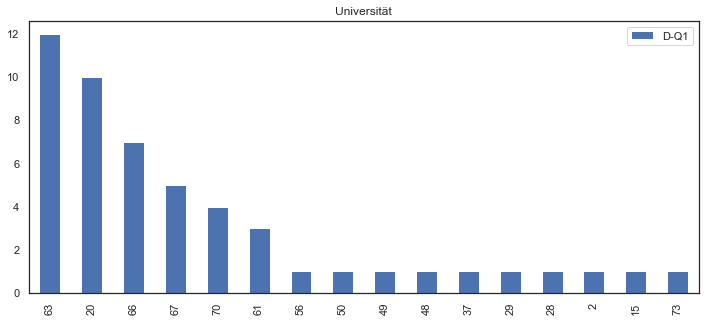

In [162]:
Finished[Finished['D-Q1'] != 0]['D-Q1'].value_counts().plot(kind='bar', 
                                                            figsize = (12,5), width = 0.5, 
                                                            legend = True, title = "Universität");

(1)	Abat Oliba-CEU
(2)	Alcalá de Henares
(3)	Alfonso X El Sabio
(4)	Alicante
(5)	Almería
(6)	Antonio de Nebrija
(7)	Autónoma de Barcelona
(8)	Autónoma de Madrid
(9)	Barcelona
(10)	Burgos
(11)	Cádiz
(12)	Camilo José Cela
(13)	Cantabria
(14)	Cardenal Herrera-CEU
(15)	Carlos III
(16)	Castilla-La Mancha
(17)	Católica de Ávila
(18)	Católica de Valencia
(19)	Católica S. Antonio de Murcia
(20)	Complutense de Madrid
(21)	Córdoba
(22)	Coruña, A
(23)	Deusto
(24)	Europea de Madrid
(25)	Europea Miguel de Cervantes
(26)	Extremadura
(27)	Francisco de Vitoria
(28)	Girona
(29)	Granada
(30)	Huelva
(31)	IE Universidad
(32)	Illes Balears
(33)	Internacional de Catalunya
(34)	Internacional de La Rioja
(35)	Internacional Valenciana
(36)	Jaén
(37)	Jaume I de Castellón
(38)	La Laguna
(39)	La Rioja
(40)	León
(41)	Lleida
(42)	Málaga
(43)	Miguel Hernández de Elche
(44)	Mondragón
(45)	Murcia
(46)	Navarra
(47)	Oberta de Catalunya
(48)	Oviedo
(49)	Pablo de Olavide
(50)	País Vasco
(51)	Palmas (Las)
(52)	Politécnica de Cartagena
(53)	Politécnica de Cataluña
(54)	Politécnica de Madrid
(55)	Politécnica de Valencia
(56)	Pompeu Fabra
(57)	Pontificia Comillas
(58)	Pontificia de Salamanca
(59)	Pública de Navarra
(60)	Ramón Llull
(61)	Rey Juan Carlos
(62)	Rovira i Virgili
(63)	Salamanca
(64)	San Jorge
(65)	San Pablo-CEU
(66)	Santiago de Compostela
(67)	Sevilla
(68)	U.N.E.D.
(69)	UDIMA
(70)	Valencia (Est. General)
(71)	Valladolid
(72)	Vic
(73)	Vigo
(74)	Zaragoza
(75)	Otra

In [163]:
Finished['D-Q1'].value_counts()

63    12
20    10
66     7
67     5
70     4
61     3
0      2
29     1
37     1
48     1
2      1
15     1
73     1
49     1
50     1
56     1
28     1
Name: D-Q1, dtype: int64

In [164]:
Finished[Finished['D-Q1']!=0]['D-Q1'].nunique()

16

Lehrende aus 16 verschiedenen Universitäten nahmen an der Befragung teil.

##### Art unterrichteter Kurse

In [165]:
As_cols = [col for col in Finished.columns if 'D-Q2' in col]
As_cols.pop(len(As_cols)-1)
As_cols.pop(len(As_cols)-1)

'D-Q2a'

In [166]:
Finished[As_cols].astype(integer).sum()

D-Q2_1    24
D-Q2_2    12
D-Q2_3     7
D-Q2_4    10
D-Q2_5     1
D-Q2_7     8
D-Q2_8     6
D-Q2_9    14
dtype: int64

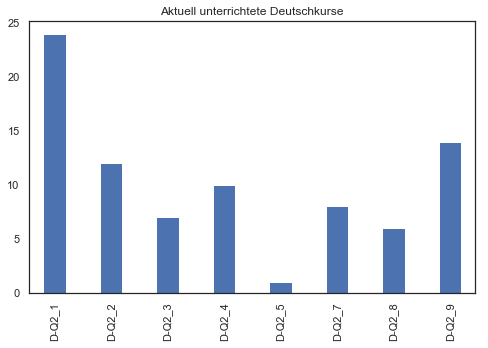

In [167]:
Finished[As_cols].astype(integer).sum().plot(kind = 'bar', figsize = (8,5), width = 0.4, title = "Aktuell unterrichtete Deutschkurse");

1.	Deutschkurs im Rahmen eines Germanistikstudiums / deutsche Philologie
2.	Deutschkurs im Rahmen eines anderen Philologiestudiums
*	Übersetzen und Dolmetschen, Erste Fremdsprache / Sprache B
*	Übersetzen und Dolmetschen, Zweite Fremdsprache / Sprache C
*	Deutschkurs im Rahmen eines humanistischen Studiums
*	Deutschkurs im Rahmen eines wirtschaftlichen Studiums
*	Deutschkurs im Rahmen eines Tourismus-Studiums
*	Anderer Deutschkurs im Rahmen eines Universitätsstudiums
*	Anderer Deutschkurs an einer universitären Einrichtung

In [168]:
Finished['D-Q2b'].value_counts()

0                                                                                  48
Zusatzkurse zur Vertiefung der in den Regelsprachkursen thematisierten Inhalten     1
Aus Beobachtungen der Dozenten der Complutense                                      1
Landeskundekurse D-A-CH                                                             1
Aleman B-1                                                                          1
Llengües Aplicades                                                                  1
Name: D-Q2b, dtype: int64

##### Niveau unterrichteter Deutschkurse

In [169]:
Niv_cols = [col for col in Finished.columns if 'D-Q3' in col]
Niv_cols.pop(len(Niv_cols)-1)

'D-Q3a'

In [170]:
Finished[Niv_cols].astype(integer).sum()

D-Q3_1    32
D-Q3_2    36
D-Q3_3    30
D-Q3_4    19
D-Q3_5     9
dtype: int64

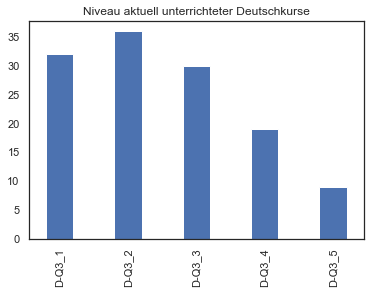

In [171]:
Finished[Niv_cols].astype(integer).sum().plot(kind = 'bar', figsize = (6,4), width = 0.4, title = "Niveau aktuell unterrichteter Deutschkurse");

(1)	A1, 
(2)	A2, 
(3)	B1, 
(4)	B2, 
(5)	C1,
(6)	C2 

##### Lehrerfahrung

In [172]:
Finished[Finished['D-Q4']!=0]['D-Q4'].value_counts()

20.0    8
6.0     4
1.0     4
15.0    3
25.0    3
5.0     3
10.0    2
4.0     2
24.0    2
30.0    2
27.0    2
38.0    2
12.0    1
19.0    1
11.0    1
16.0    1
8.0     1
40.0    1
2.0     1
7.0     1
32.0    1
9.0     1
0.5     1
Name: D-Q4, dtype: int64

In [173]:
Finished[Finished['D-Q4']!=0]['D-Q4'].describe()

count    48.000000
mean     15.531250
std      10.943475
min       0.500000
25%       6.000000
50%      15.000000
75%      24.000000
max      40.000000
Name: D-Q4, dtype: float64

##### Sprachkenntnisse

Deutsch:

In [174]:
Finished[Finished['D-Q5_1']!=0]['D-Q5_1'].value_counts()

7    35
6     8
5     6
1     2
2     1
Name: D-Q5_1, dtype: int64

Spanisch:

In [175]:
Finished[Finished['D-Q5_2']!=0]['D-Q5_2'].value_counts()

7    19
6    18
5    11
4     2
3     2
Name: D-Q5_2, dtype: int64

Englisch:

In [176]:
Finished[Finished['D-Q5_3']!=0]['D-Q5_3'].value_counts()

4    20
5    17
6     7
3     4
7     2
2     2
Name: D-Q5_3, dtype: int64

Gewählte Version des Fragebogens:

In [177]:
Daten['UserLanguage'].value_counts()

ES-ES    31
DE       22
Name: UserLanguage, dtype: int64

##### Geschlecht

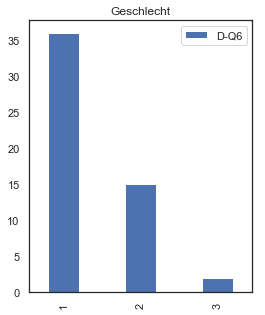

In [178]:
Finished['D-Q6'].value_counts()[[1,2,3]].plot(kind = 'bar', figsize = (4,5), width = 0.4, legend = True, title = "Geschlecht");

In [179]:
Finished['D-Q6'].value_counts()

1    36
2    15
3     2
Name: D-Q6, dtype: int64